# FPoliSolutions: Predictive Maintenance
## Supporting Cluster Analysis
#### By: Kathryn Lavelle

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Read Data

In [2]:
# Read in the data from the .csv file
df = pd.read_csv('training_data.csv')

##### Melt all input data

In [6]:
# Create an object that contains just the input column names
input_names = df.drop(columns=['Y']).columns

In [7]:
# Create a DataFarme to hold the input variables
df_inputs = df.drop(columns=['Y']).copy()

In [8]:
# Melt the original data set for easier visualizations
# Use the `input_names` list to specify which columns to stack
lf = df.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y'], value_vars=input_names, ignore_index=True)

##### Separate inputs by feature

In [29]:
# Create a DataFrame with just the `X` inputs
df_inputs_X = pd.DataFrame(df, columns=['X01', 'X02', 'X03', 'X04', 'X05',\
                                        'X06', 'X07', 'X08', 'X09', 'X10',\
                                        'X11', 'X12', 'X13', 'X14', 'X15',\
                                        'X16', 'X17', 'X18', 'X19', 'X20',\
                                        'X21', 'X22', 'X23', 'X24', 'X25'])

In [30]:
# Create a DataFrame with just the `Z` inputs
df_inputs_Z = pd.DataFrame(df, columns=['Z01', 'Z02', 'Z03', 'Z04', 'Z05',\
                                        'Z06', 'Z07', 'Z08', 'Z09'])

In [31]:
# Create a DataFrame with just the `V` inputs
df_inputs_V = pd.DataFrame(df, columns=['V01', 'V02', 'V03', 'V04', 'V05',\
                                        'V06', 'V07', 'V08', 'V09', 'V10',\
                                        'V11', 'V12', 'V13', 'V14', 'V15',\
                                        'V16', 'V17', 'V18', 'V19', 'V20',\
                                        'V21', 'V22', 'V23', 'V24', 'V25',\
                                        'V26', 'V27', 'V28', 'V29'])

##### Pair the input features for easy visualization

In [32]:
# Group the `X` and `Z` inputs
df_group_X_Z = pd.concat([df_inputs_X, df_inputs_Z], axis=1)

In [34]:
# Group the `X` and `V` inputs
df_group_X_V = pd.concat([df_inputs_X, df_inputs_V], axis=1)

In [36]:
# Group the `Z` and `V` inputs
df_group_Z_V = pd.concat([df_inputs_Z, df_inputs_V], axis=1)

##### Add the `Y` output column

In [38]:
# Combine the inputs and Y output data
df_inputs_ZY = pd.concat([df_inputs_Z, df.Y], axis=1)
df_inputs_XY = pd.concat([df_inputs_X, df.Y], axis=1)
df_inputs_VY = pd.concat([df_inputs_V, df.Y], axis=1)

In [39]:
# Get list of input column names
z_input_names = df_inputs_Z.columns
x_input_names = df_inputs_X.columns
v_input_names = df_inputs_V.columns

##### Melt the paired feature data

In [40]:
# Melt the inputs and Y output into separate objects for easier visualization
lf_inputs_ZY = df_inputs_ZY.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y'], value_vars=z_input_names, ignore_index=True)

In [41]:
lf_inputs_XY = df_inputs_XY.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y'], value_vars=x_input_names, ignore_index=True)

In [42]:
lf_inputs_VY = df_inputs_VY.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y'], value_vars=v_input_names, ignore_index=True)

## Cluster Analysis

### KMeans: 2 Clusters

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [34]:
# We will be performing a cluster analysis on just the input variables
df_inputs

X01       X02       X03       X04       X05       X06       X07  \
0    -2.907070  1.266914 -0.332039 -0.248782  0.200432 -0.008683  0.316866   
1    -4.608052  4.672474  0.154697  0.268719 -0.842417  0.055191  0.622848   
2     4.338816  5.684974  1.868370 -1.883006  0.589758  0.932240 -0.646026   
3    -1.835062  0.427501 -2.226023  0.700375 -1.144850  1.188100  0.727831   
4    13.990969 -3.877269  1.921605  0.162288  2.316402 -0.161137 -0.099180   
..         ...       ...       ...       ...       ...       ...       ...   
218  -3.454719 -0.911378  1.072785  0.845129  1.817682 -0.034388 -0.394277   
219   0.493271  2.184699  0.107755 -1.852857  0.329977  0.679100  0.933463   
220  -5.009510 -0.488819  0.838883  0.615571  0.069954 -0.365945 -0.290072   
221  -2.665672 -0.546497 -0.545406 -0.477273  1.476238 -0.019403  0.280312   
222   0.055307 -1.709225 -0.763259 -0.755982 -0.106586 -1.174575 -0.608212   

          X08       X09       X10  ...       V20       V21       V22  \
0   -0.323924  0.030199 -0.205569  ... -0.244893  0.552065  0.489846   
1   -0.260097 -0.651079  1.096821  ...  0.869478  1.989505  1.355984   
2    0.183410  0.132287 -0.426386  ...  2.300102  2.128248  2.553980   
3   -0.271734  0.003246  0.138308  ... -0.193914 -0.856860 -0.766993   
4    0.514620 -0.551956 -0.517779  ... -0.246222 -0.333291  0.126656   
..        ...       ...       ...  ...       ...       ...       ...   
218 -0.260803  0.018067 -0.718457  ... -0.545864 -1.041533 -0.585809   
219  0.110013  0.234102 -0.080677  ...  0.998048  1.599908  1.485953   
220  0.777958 -0.392741  0.126245  ... -0.419527 -0.769891 -0.384573   
221  0.359992 -0.136810  0.116397  ... -0.825147 -0.092393 -0.962929   
222 -0.483285 -0.055759 -0.658711  ... -0.273754  0.076693  0.434874   

          V23       V24       V25       V26       V27       V28         V29  
0    1.113175 -0.240931 -0.108875 -0.114766  0.841632  0.104236 -121.810994  
1    1.656029  2.428749  1.068637  1.945175  0.950544  0.143290  -59.362086  
2    2.661607  2.625942  4.462401  3.621299  0.992381  0.127803  -79.575912  
3   -0.882442 -0.832196 -0.377106 -0.633452  0.964183  0.088978 -139.426151  
4   -0.557930 -0.185135 -0.639549 -0.245234  0.845817  0.172305  -29.433234  
..        ...       ...       ...       ...       ...       ...         ...  
218 -0.831599  0.315496 -2.098443 -0.767479  0.941532  0.112127 -100.512718  
219  1.326105  0.738920  1.782694  1.221559  0.965555  0.098206 -118.299085  
220 -0.894474 -1.071848 -0.755456 -1.001084  0.898706  0.106729 -102.237684  
221 -0.580874 -0.750556 -1.618888 -1.083649  0.964139  0.096673 -119.015441  
222  0.371620  0.947893  0.775466  0.472459  0.914727  0.137963  -78.872248  

[223 rows x 63 columns]

##### Standardize the data

In [35]:
# Standardize the input data
Xinput = StandardScaler().fit_transform(df_inputs)

In [36]:
Xinput.shape

(223, 63)

##### PCA

In [37]:
# Fit and transform with standardized data
input_pca = PCA(n_components=2).fit_transform(Xinput)

In [38]:
input_pca.shape

(223, 2)

In [39]:
# DataFrame to hold new variables
input_pca_df = pd.DataFrame(input_pca, columns=['pc01', 'pc02'])
input_pca_df

pc01      pc02
0   -0.807407 -1.446378
1   -4.174854 -0.538055
2   -4.645541  4.032124
3    0.955849 -0.073032
4    1.109275  0.796159
..        ...       ...
218  1.519929 -1.199317
219 -3.871579 -1.462739
220  2.873937  0.290372
221  0.345705 -2.490472
222 -0.512250 -1.551838

[223 rows x 2 columns]

##### KMeans

In [40]:
# Fit, predict, and transform
km2 = KMeans(n_clusters=2, random_state=140, n_init=25, max_iter=500).fit_predict(Xinput)

In [41]:
# Create a copy of the original input data set
df_inputs_copy = df_inputs.copy()

In [43]:
# Add a column `k2` to store the result of the KMeans cluster labels
df_inputs_copy['k2'] = pd.Series(km2, index=df_inputs_copy.index)

In [48]:
df_inputs_copy

X01       X02       X03       X04       X05       X06       X07  \
0    -2.907070  1.266914 -0.332039 -0.248782  0.200432 -0.008683  0.316866   
1    -4.608052  4.672474  0.154697  0.268719 -0.842417  0.055191  0.622848   
2     4.338816  5.684974  1.868370 -1.883006  0.589758  0.932240 -0.646026   
3    -1.835062  0.427501 -2.226023  0.700375 -1.144850  1.188100  0.727831   
4    13.990969 -3.877269  1.921605  0.162288  2.316402 -0.161137 -0.099180   
..         ...       ...       ...       ...       ...       ...       ...   
218  -3.454719 -0.911378  1.072785  0.845129  1.817682 -0.034388 -0.394277   
219   0.493271  2.184699  0.107755 -1.852857  0.329977  0.679100  0.933463   
220  -5.009510 -0.488819  0.838883  0.615571  0.069954 -0.365945 -0.290072   
221  -2.665672 -0.546497 -0.545406 -0.477273  1.476238 -0.019403  0.280312   
222   0.055307 -1.709225 -0.763259 -0.755982 -0.106586 -1.174575 -0.608212   

          X08       X09       X10  ...       V21       V22       V23  \
0   -0.323924  0.030199 -0.205569  ...  0.552065  0.489846  1.113175   
1   -0.260097 -0.651079  1.096821  ...  1.989505  1.355984  1.656029   
2    0.183410  0.132287 -0.426386  ...  2.128248  2.553980  2.661607   
3   -0.271734  0.003246  0.138308  ... -0.856860 -0.766993 -0.882442   
4    0.514620 -0.551956 -0.517779  ... -0.333291  0.126656 -0.557930   
..        ...       ...       ...  ...       ...       ...       ...   
218 -0.260803  0.018067 -0.718457  ... -1.041533 -0.585809 -0.831599   
219  0.110013  0.234102 -0.080677  ...  1.599908  1.485953  1.326105   
220  0.777958 -0.392741  0.126245  ... -0.769891 -0.384573 -0.894474   
221  0.359992 -0.136810  0.116397  ... -0.092393 -0.962929 -0.580874   
222 -0.483285 -0.055759 -0.658711  ...  0.076693  0.434874  0.371620   

          V24       V25       V26       V27       V28         V29  k2  
0   -0.240931 -0.108875 -0.114766  0.841632  0.104236 -121.810994   1  
1    2.428749  1.068637  1.945175  0.950544  0.143290  -59.362086   1  
2    2.625942  4.462401  3.621299  0.992381  0.127803  -79.575912   1  
3   -0.832196 -0.377106 -0.633452  0.964183  0.088978 -139.426151   0  
4   -0.185135 -0.639549 -0.245234  0.845817  0.172305  -29.433234   0  
..        ...       ...       ...       ...       ...         ...  ..  
218  0.315496 -2.098443 -0.767479  0.941532  0.112127 -100.512718   0  
219  0.738920  1.782694  1.221559  0.965555  0.098206 -118.299085   1  
220 -1.071848 -0.755456 -1.001084  0.898706  0.106729 -102.237684   0  
221 -0.750556 -1.618888 -1.083649  0.964139  0.096673 -119.015441   0  
222  0.947893  0.775466  0.472459  0.914727  0.137963  -78.872248   1  

[223 rows x 64 columns]

In [49]:
# Number of observations per cluster
df_inputs_copy['k2'] = df_inputs_copy.k2.astype('category')
df_inputs_copy.k2.value_counts()

k2
0    116
1    107
Name: count, dtype: int64

The clusters are generally balanced with a similiar number of observations in each.

#### Visualize the cluster results

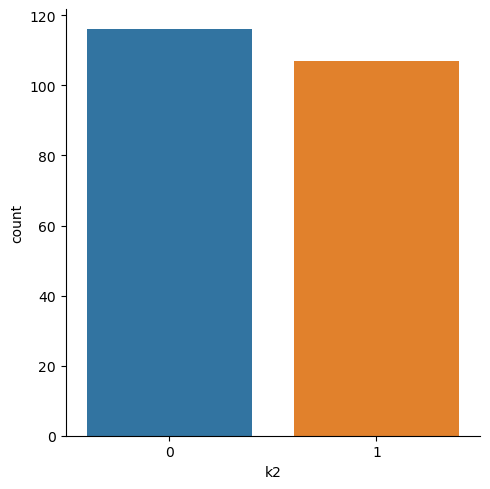

In [51]:
# Visualize the number of observations per cluster using a count plot
sns.catplot(data=df_inputs_copy, x='k2', kind='count')

plt.show()

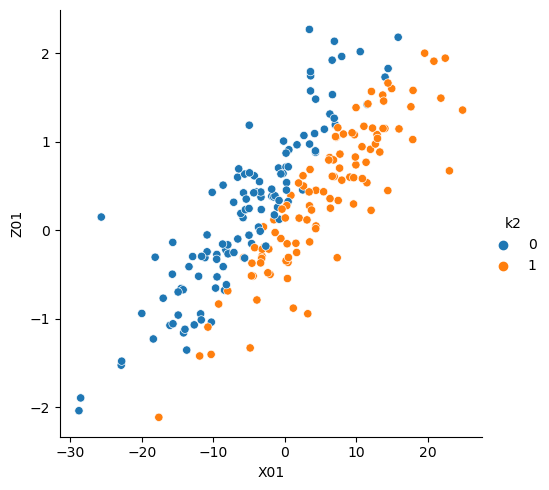

In [52]:
# Visualize the cluster results between 2 of the variables
sns.relplot(data = df_inputs_copy, x='X01', y='Z01', hue='k2')

plt.show()

#### Visualize the cluster results using PCA

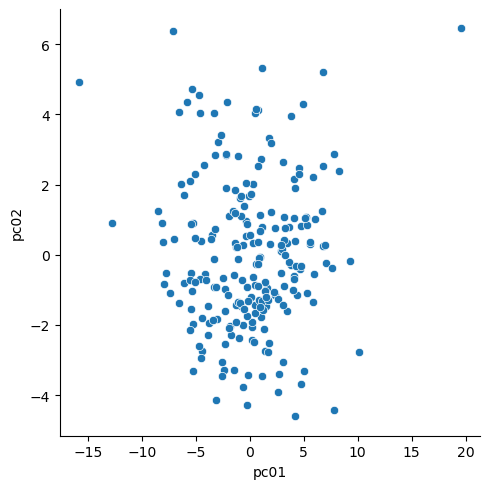

In [53]:
# Visualize the relationship between the 2 new variables
sns.relplot(data = input_pca_df, x='pc01', y='pc02')

plt.show()

In [54]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict(Xinput)

In [55]:
input_pca_df['k2'] = pd.Series( clusters_2, index=input_pca_df.index ).astype('category')

In [56]:
input_pca_df

pc01      pc02 k2
0   -0.807407 -1.446378  0
1   -4.174854 -0.538055  0
2   -4.645541  4.032124  0
3    0.955849 -0.073032  1
4    1.109275  0.796159  1
..        ...       ... ..
218  1.519929 -1.199317  1
219 -3.871579 -1.462739  0
220  2.873937  0.290372  1
221  0.345705 -2.490472  1
222 -0.512250 -1.551838  0

[223 rows x 3 columns]

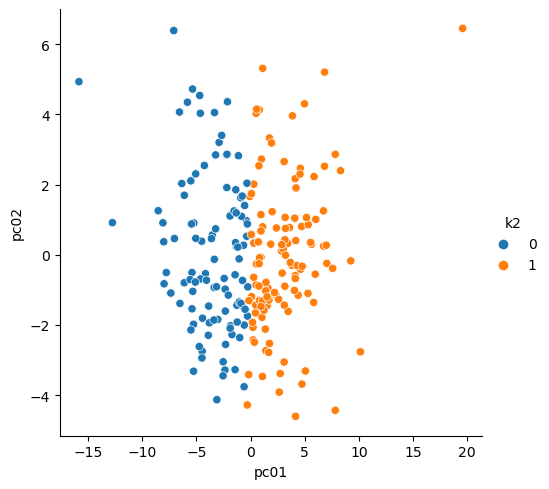

In [57]:
# Visualize the relationship between the 2 new variables grouped by `k2`
sns.relplot(data = input_pca_df, x='pc01', y='pc02', hue='k2')

plt.show()

In [89]:
input_pca_df.k2.value_counts()

k2
1    119
0    104
Name: count, dtype: int64

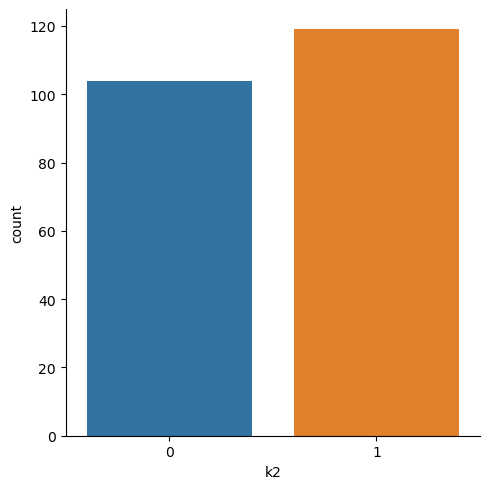

In [88]:
sns.catplot(data=input_pca_df, x='k2', kind='count')

plt.show()

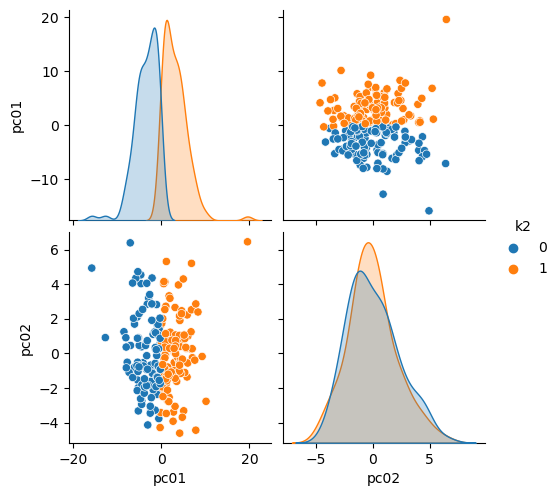

In [98]:
# Visualize the relationship between the 2 new variables with a pair plot grouped by `k2`
sns.pairplot(data = input_pca_df.drop(columns=['Y']), hue='k2', diag_kws={'common_norm': False})

plt.show()

In [67]:
input_pca_df['Y'] = df.Y
input_pca_df

pc01      pc02 k2  Y
0   -0.807407 -1.446378  0  1
1   -4.174854 -0.538055  0  1
2   -4.645541  4.032124  0  1
3    0.955849 -0.073032  1  0
4    1.109275  0.796159  1  1
..        ...       ... .. ..
218  1.519929 -1.199317  1  0
219 -3.871579 -1.462739  0  1
220  2.873937  0.290372  1  1
221  0.345705 -2.490472  1  1
222 -0.512250 -1.551838  0  1

[223 rows x 4 columns]

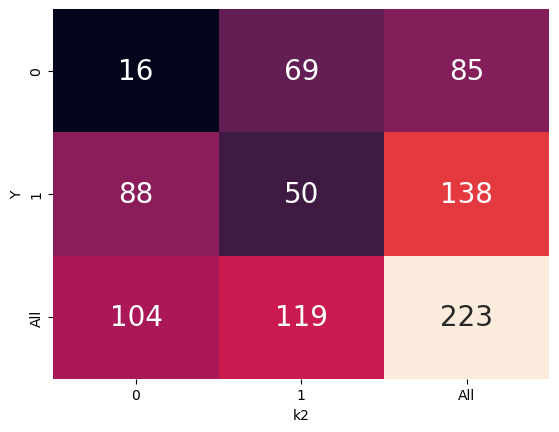

In [68]:
# Compare the identified clusters `k2` to the known binary categories
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab(input_pca_df.Y, input_pca_df.k2, margins=True ),
            annot=True, annot_kws={'fontsize': 20}, fmt='g', 
            cbar=False,
            ax=ax)

plt.show()

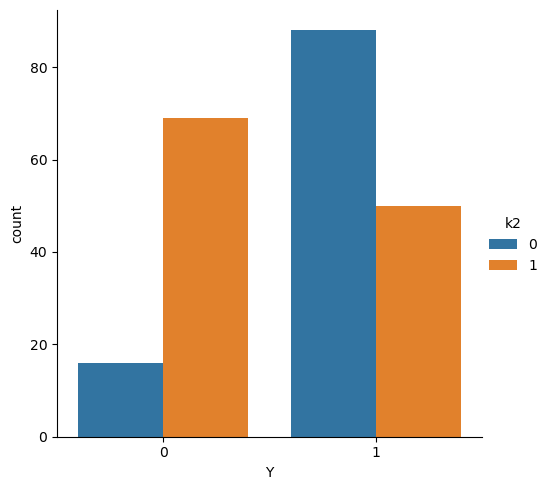

In [69]:
sns.catplot(data = input_pca_df, x='Y', hue='k2', kind='count')

plt.show()

##### What is the optimal number of clusters?

We did not find any obvious or true groupings in the data or plots. We *could* use 63 clusters, one for each of the input variables, however this is a large number and might not be relevent to the data. The data exploration did find a higher density in three locations. Therefore, 3-5 clusters might be ideal if you consider the data between each of the high density points as a separate group. However, we will use a Knee Bend plot to determine the optimal number of clusters.

### KMeans: Knee Bend Plot

In [70]:
# Use a Knee Bend plot to determine the optimal number of clusters
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit( Xinput )
    
    tots_within.append( km.inertia_ )

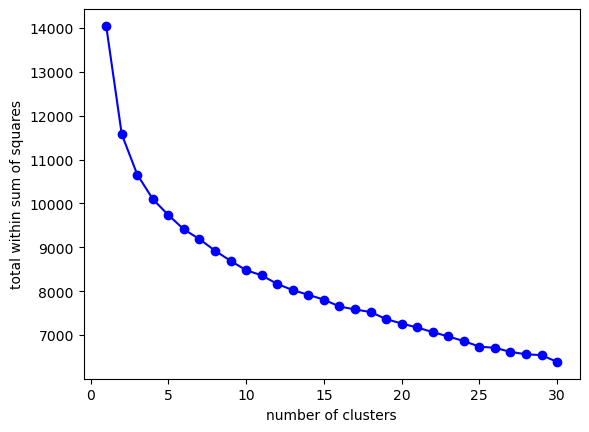

In [71]:
# Visualize the Knee Bend plot
fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-' )
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

Based on the Knee Bend plot, the `optimal number of clusters` is around `3`.

### KMeans: Optimal Clusters

In [72]:
# Fit, predict, and transform
km3 = KMeans(n_clusters=3, random_state=140, n_init=25, max_iter=500).fit_predict(Xinput)

In [73]:
# Add a column `k3` to store the result of the KMeans cluster labels
df_inputs_copy['k3'] = pd.Series(km3, index=df_inputs_copy.index)

In [74]:
df_inputs_copy.columns

Index(['X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'X24', 'X25', 'Z01', 'Z02', 'Z03', 'Z04', 'Z05',
       'Z06', 'Z07', 'Z08', 'Z09', 'V01', 'V02', 'V03', 'V04', 'V05', 'V06',
       'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'V29', 'k2', 'k3'],
      dtype='object')

In [75]:
# Number of observations per cluster
df_inputs_copy['k3'] = df_inputs_copy.k3.astype('category')
df_inputs_copy.k3.value_counts()

k3
0    107
1     60
2     56
Name: count, dtype: int64

#### Visualize the cluster results

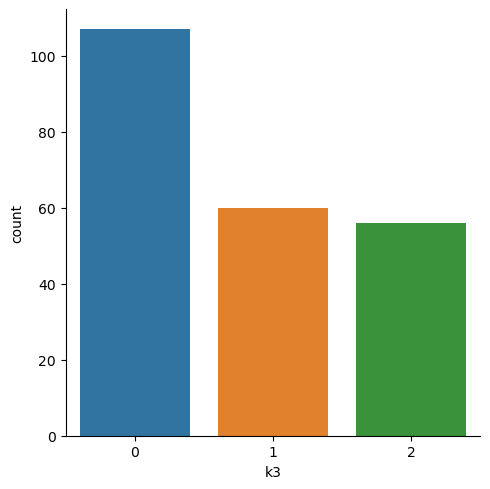

In [76]:
# Visualize the number of observations per cluster using a count plot
sns.catplot(data=df_inputs_copy, x='k3', kind='count')

plt.show()

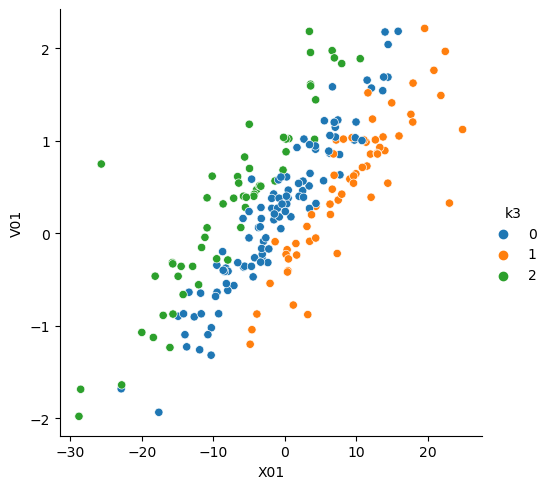

In [77]:
# Visualize the cluster results between 2 of the variables
sns.relplot(data = df_inputs_copy, x='X01', y='V01', hue='k3')

plt.show()

#### Visualize optimal clusters using PCA

In [78]:
clusters_3 = KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500).fit_predict( Xinput )

In [79]:
input_pca_df['k3'] = pd.Series( clusters_3, index=input_pca_df.index ).astype('category')

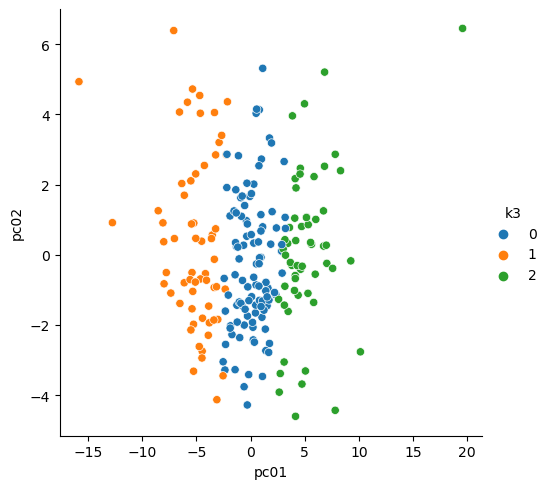

In [80]:
# Visualize the relationship between the 3 new variables grouped by `k3`
sns.relplot(data = input_pca_df, x='pc01', y='pc02', hue='k3')

plt.show()

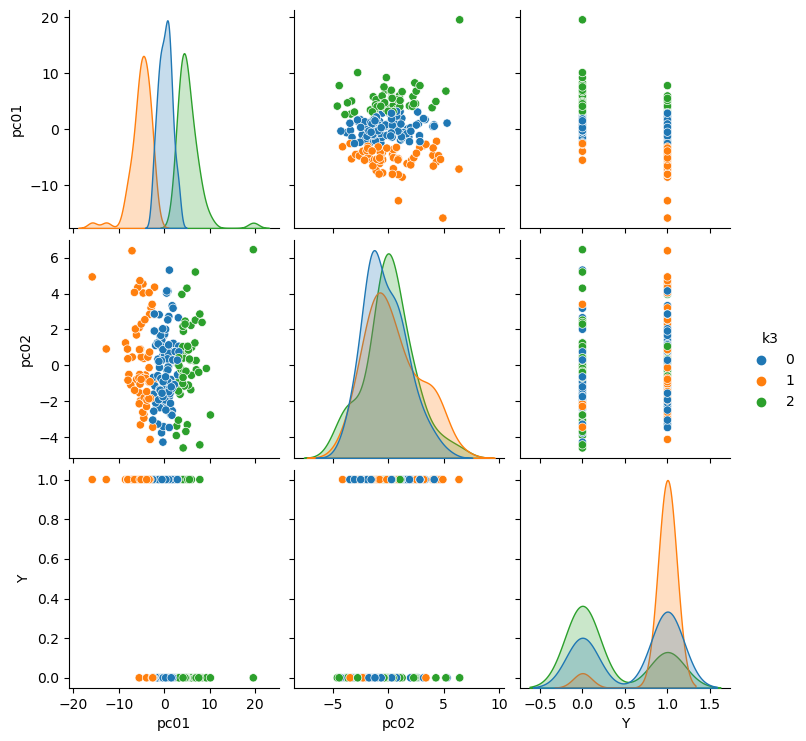

In [81]:
# Visualize the relationship between the 3 new variables with a pair plot grouped by `k3`
sns.pairplot(data = input_pca_df, hue='k3', diag_kws={'common_norm': False})

plt.show()

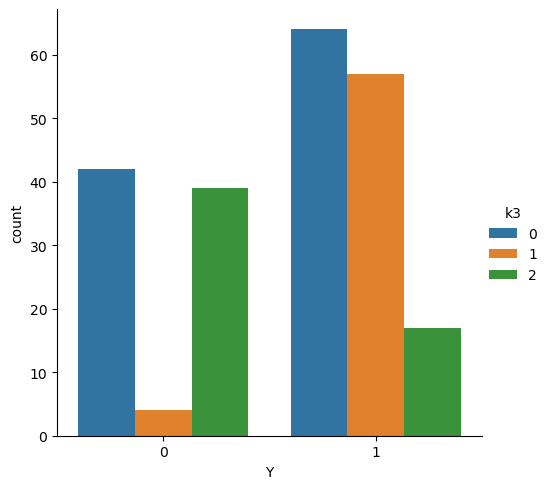

In [84]:
sns.catplot(data = input_pca_df, x='Y', hue='k3', kind='count')

plt.show()

#### Cluster Interpretation: 
*This data set did not have any known groupings, however the visualizations with `2` and `3` clusters seem to fit the data well. It is easy to see the concentraion of data points within the determined clusters.*

This was a `classification` problem with a binary output. Based off of the Knee Bend Plot, we determined that the optimal number of clusters was `3`, but it could have been `2`. I believe that with two clusters, the input data is more evenly distributed than with three.

In [86]:
# Melt the input and cluster data for easier visualization
lf_inputs = df_inputs_copy.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['k2', 'k3'], value_vars=input_names, ignore_index=True)

In [87]:
lf_inputs

k2 k3 variable       value
0      1  0      X01   -2.907070
1      1  1      X01   -4.608052
2      1  1      X01    4.338816
3      0  0      X01   -1.835062
4      0  0      X01   13.990969
...   .. ..      ...         ...
14044  0  0      V29 -100.512718
14045  1  1      V29 -118.299085
14046  0  0      V29 -102.237684
14047  0  0      V29 -119.015441
14048  1  0      V29  -78.872248

[14049 rows x 4 columns]

Visualize the distributions given 2 Clusters: `k2`

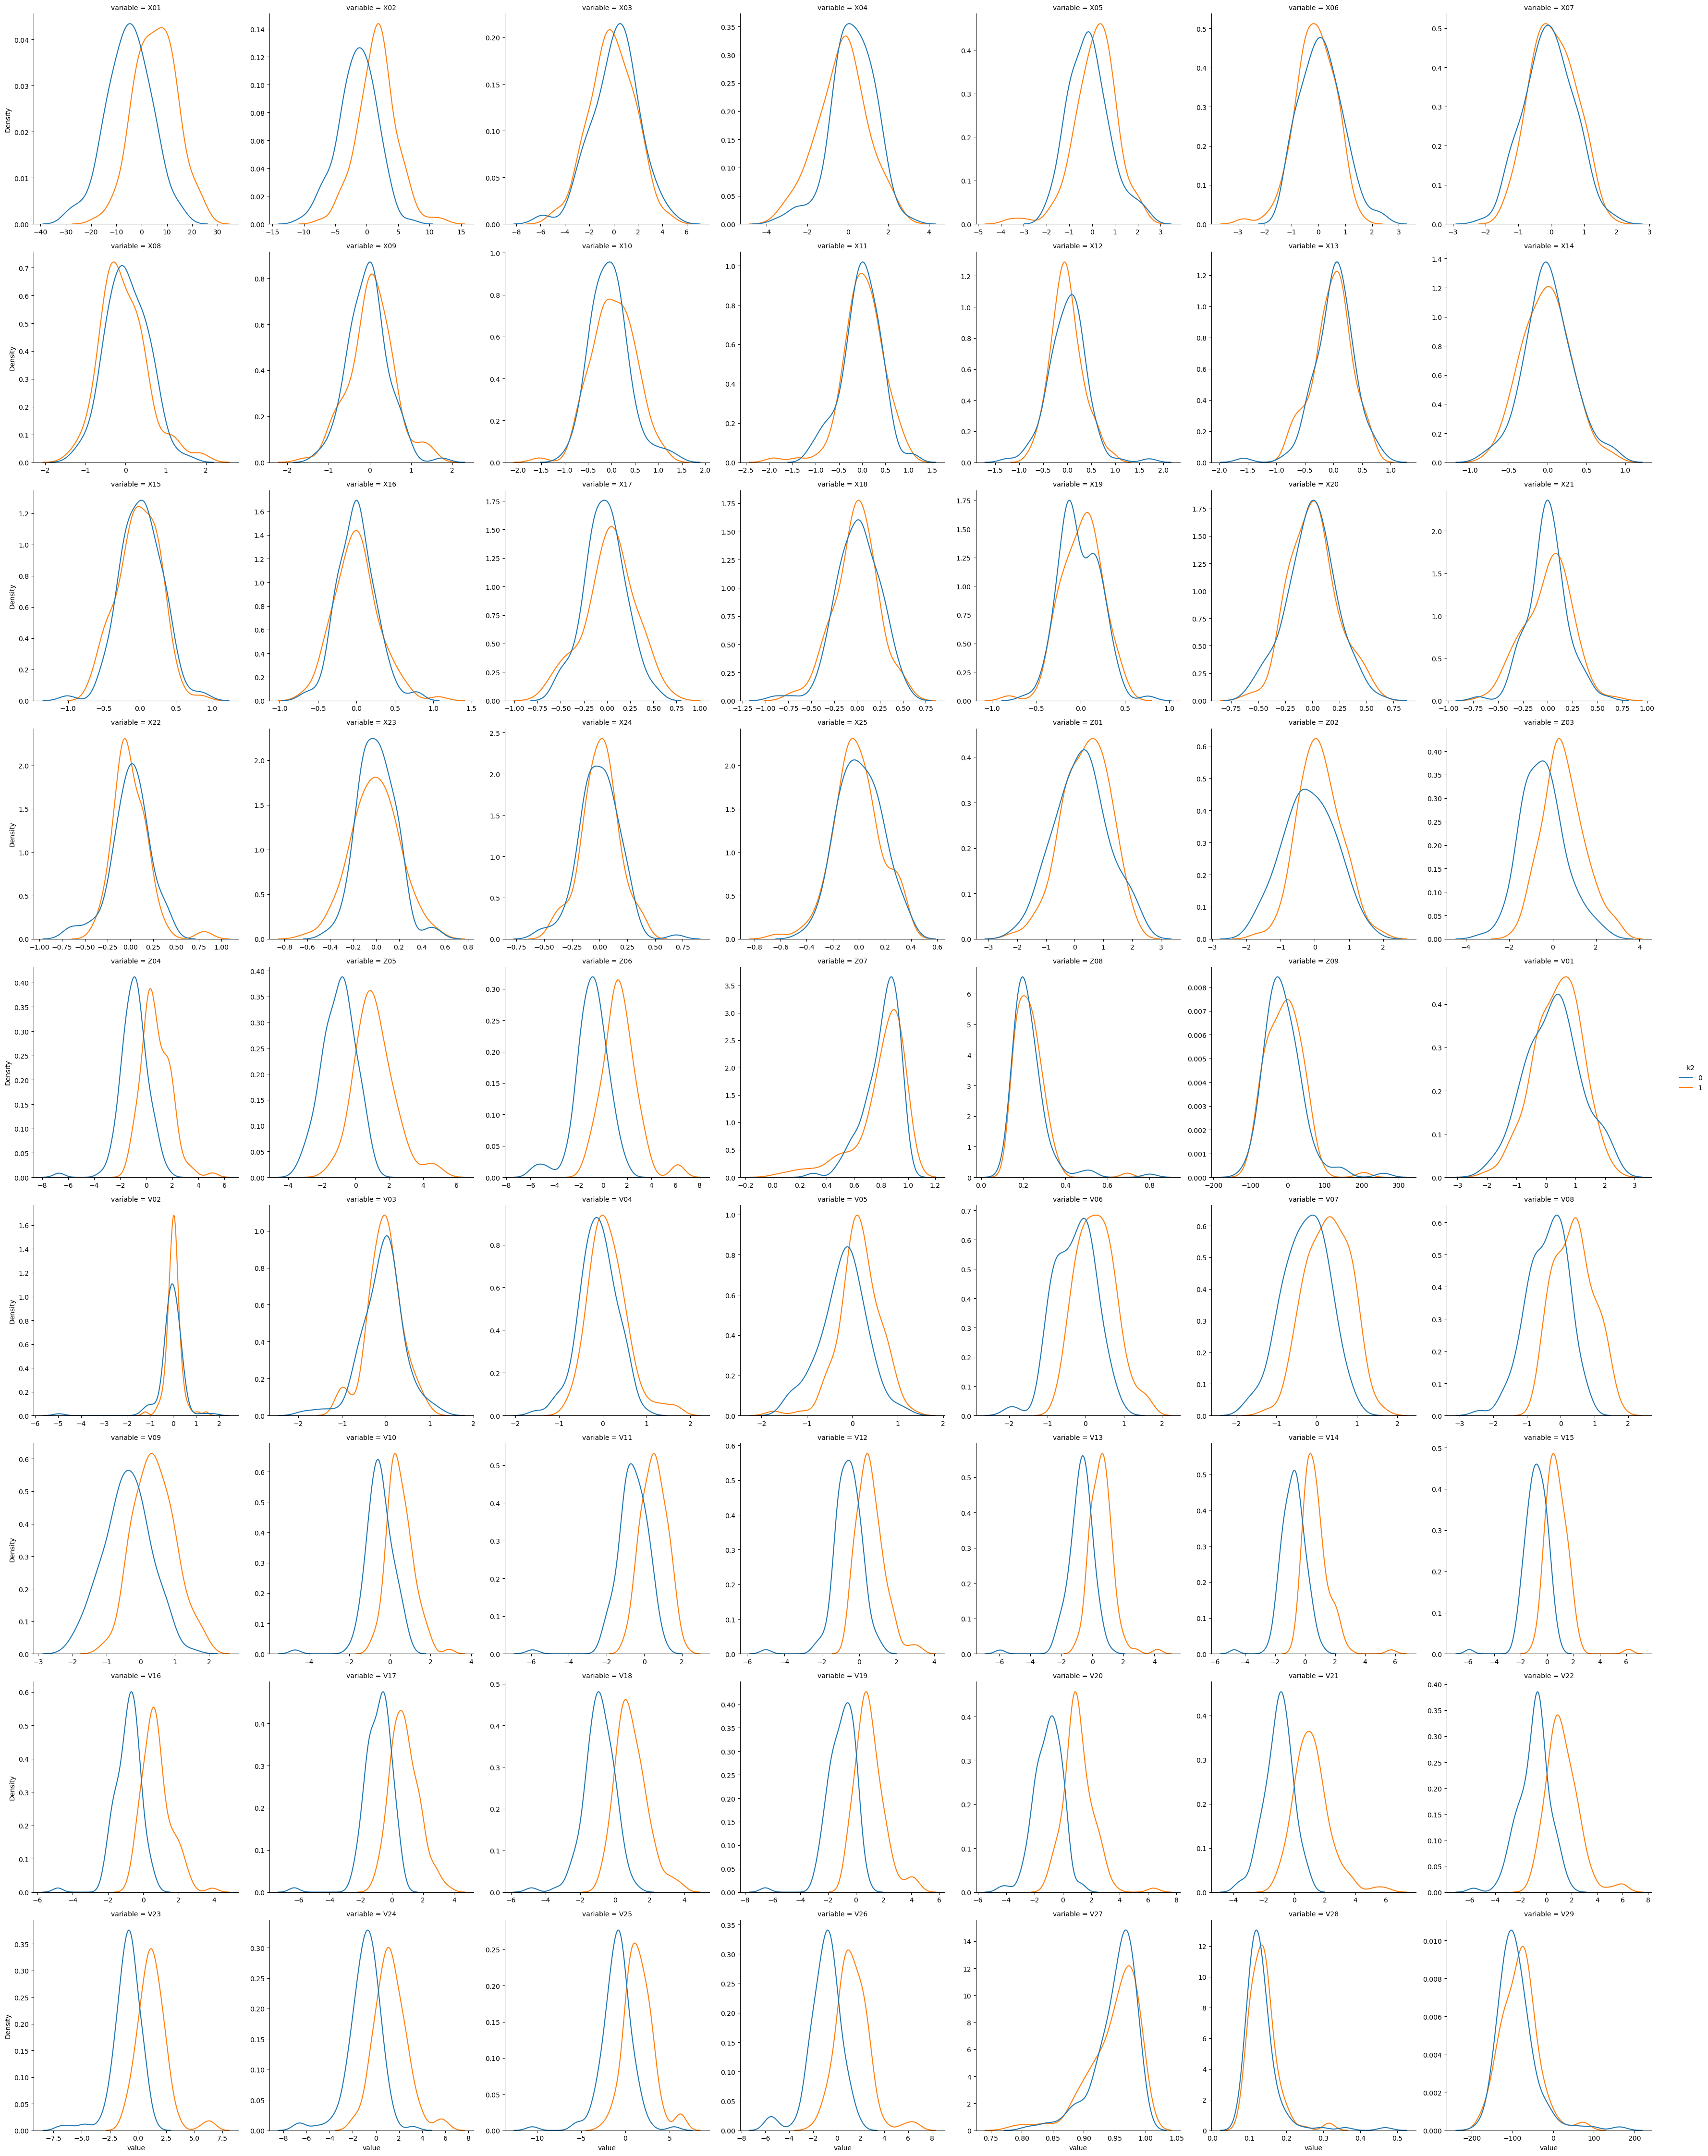

In [88]:
# Visualize the conditional distributions for the input variables colored cluster
sns.displot(data=lf_inputs, x='value', col='variable', hue='k2', kind='kde',\
col_wrap=7, facet_kws={'sharex': False, 'sharey': False},\
common_norm=False)

plt.show()

Visualize the distributions given 3 Clusters: `k3`

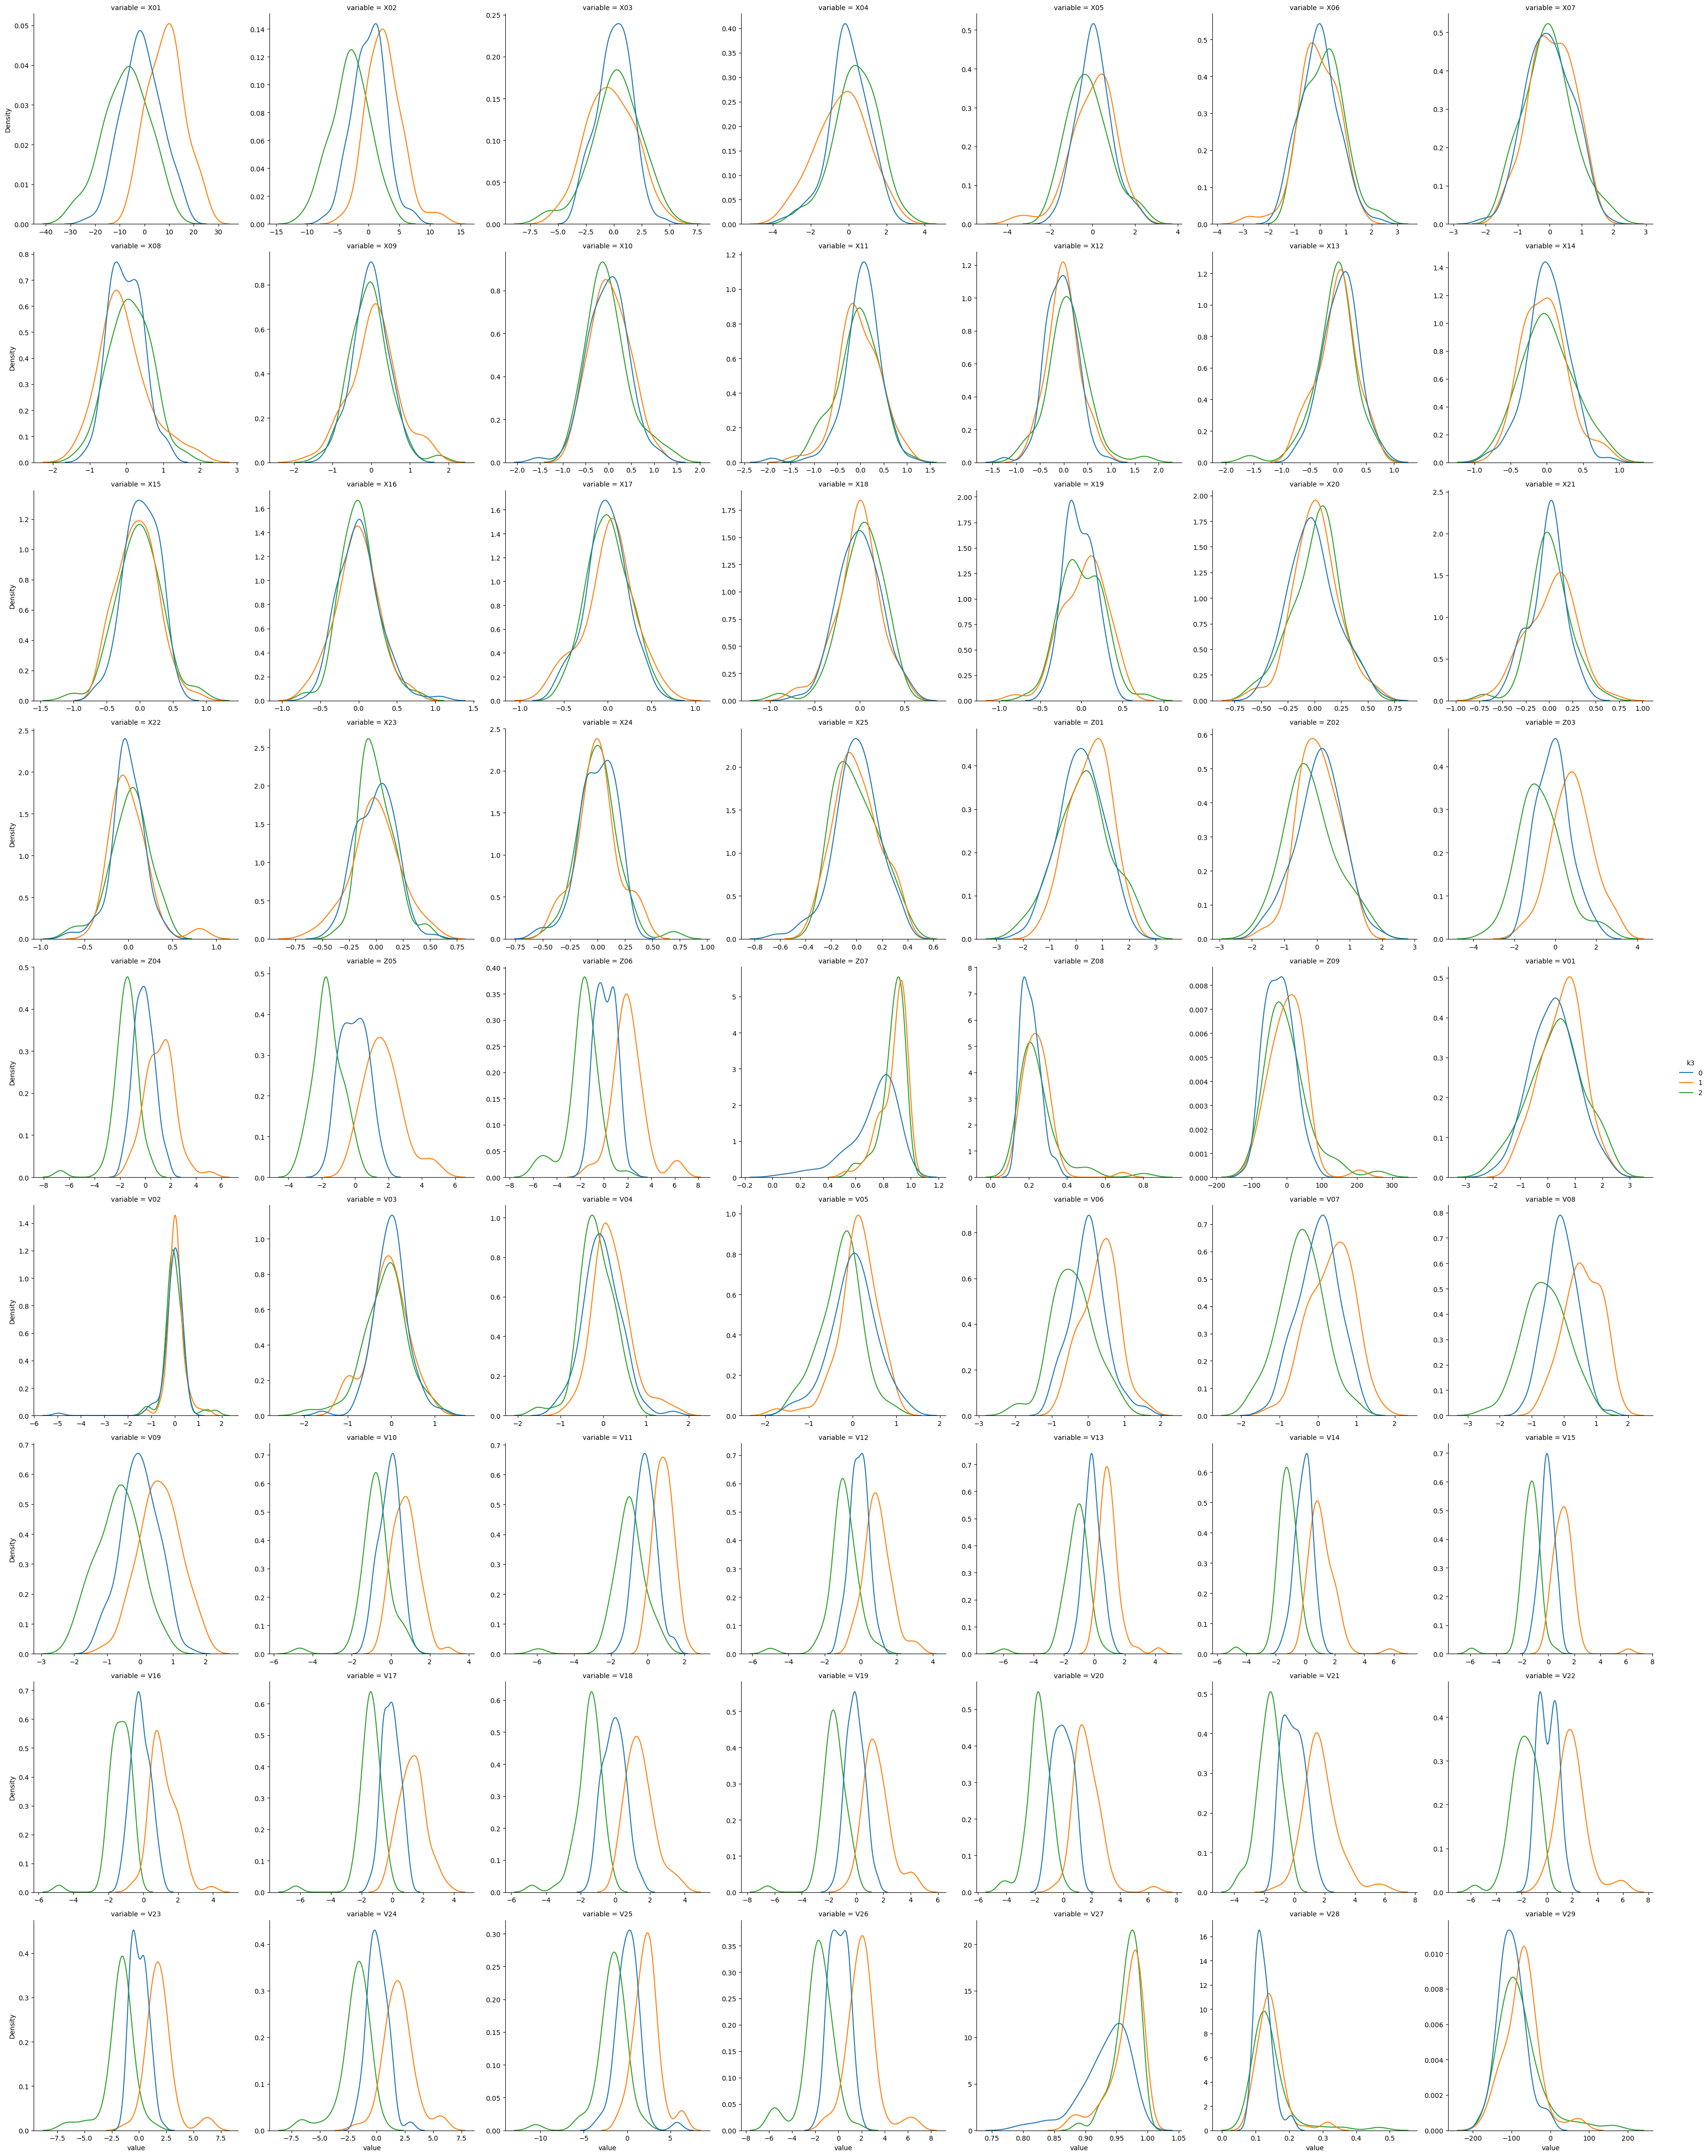

In [89]:
# Visualize the conditional distributions for the input variables grouped by `k3`
sns.displot(data=lf_inputs, x='value', col='variable', hue='k3', kind='kde',\
col_wrap=7, facet_kws={'sharex': False, 'sharey': False},\
common_norm=False)

plt.show()

Overall, the plots depicting the conditional distrubtions of the input variables given the identified clusters confirms that we believed the distribution seemed more even with `2` clusters than with `3`. This may be correlated to the fact that the variable `Y` is a binary output and has two possible values.

## Preprocessing

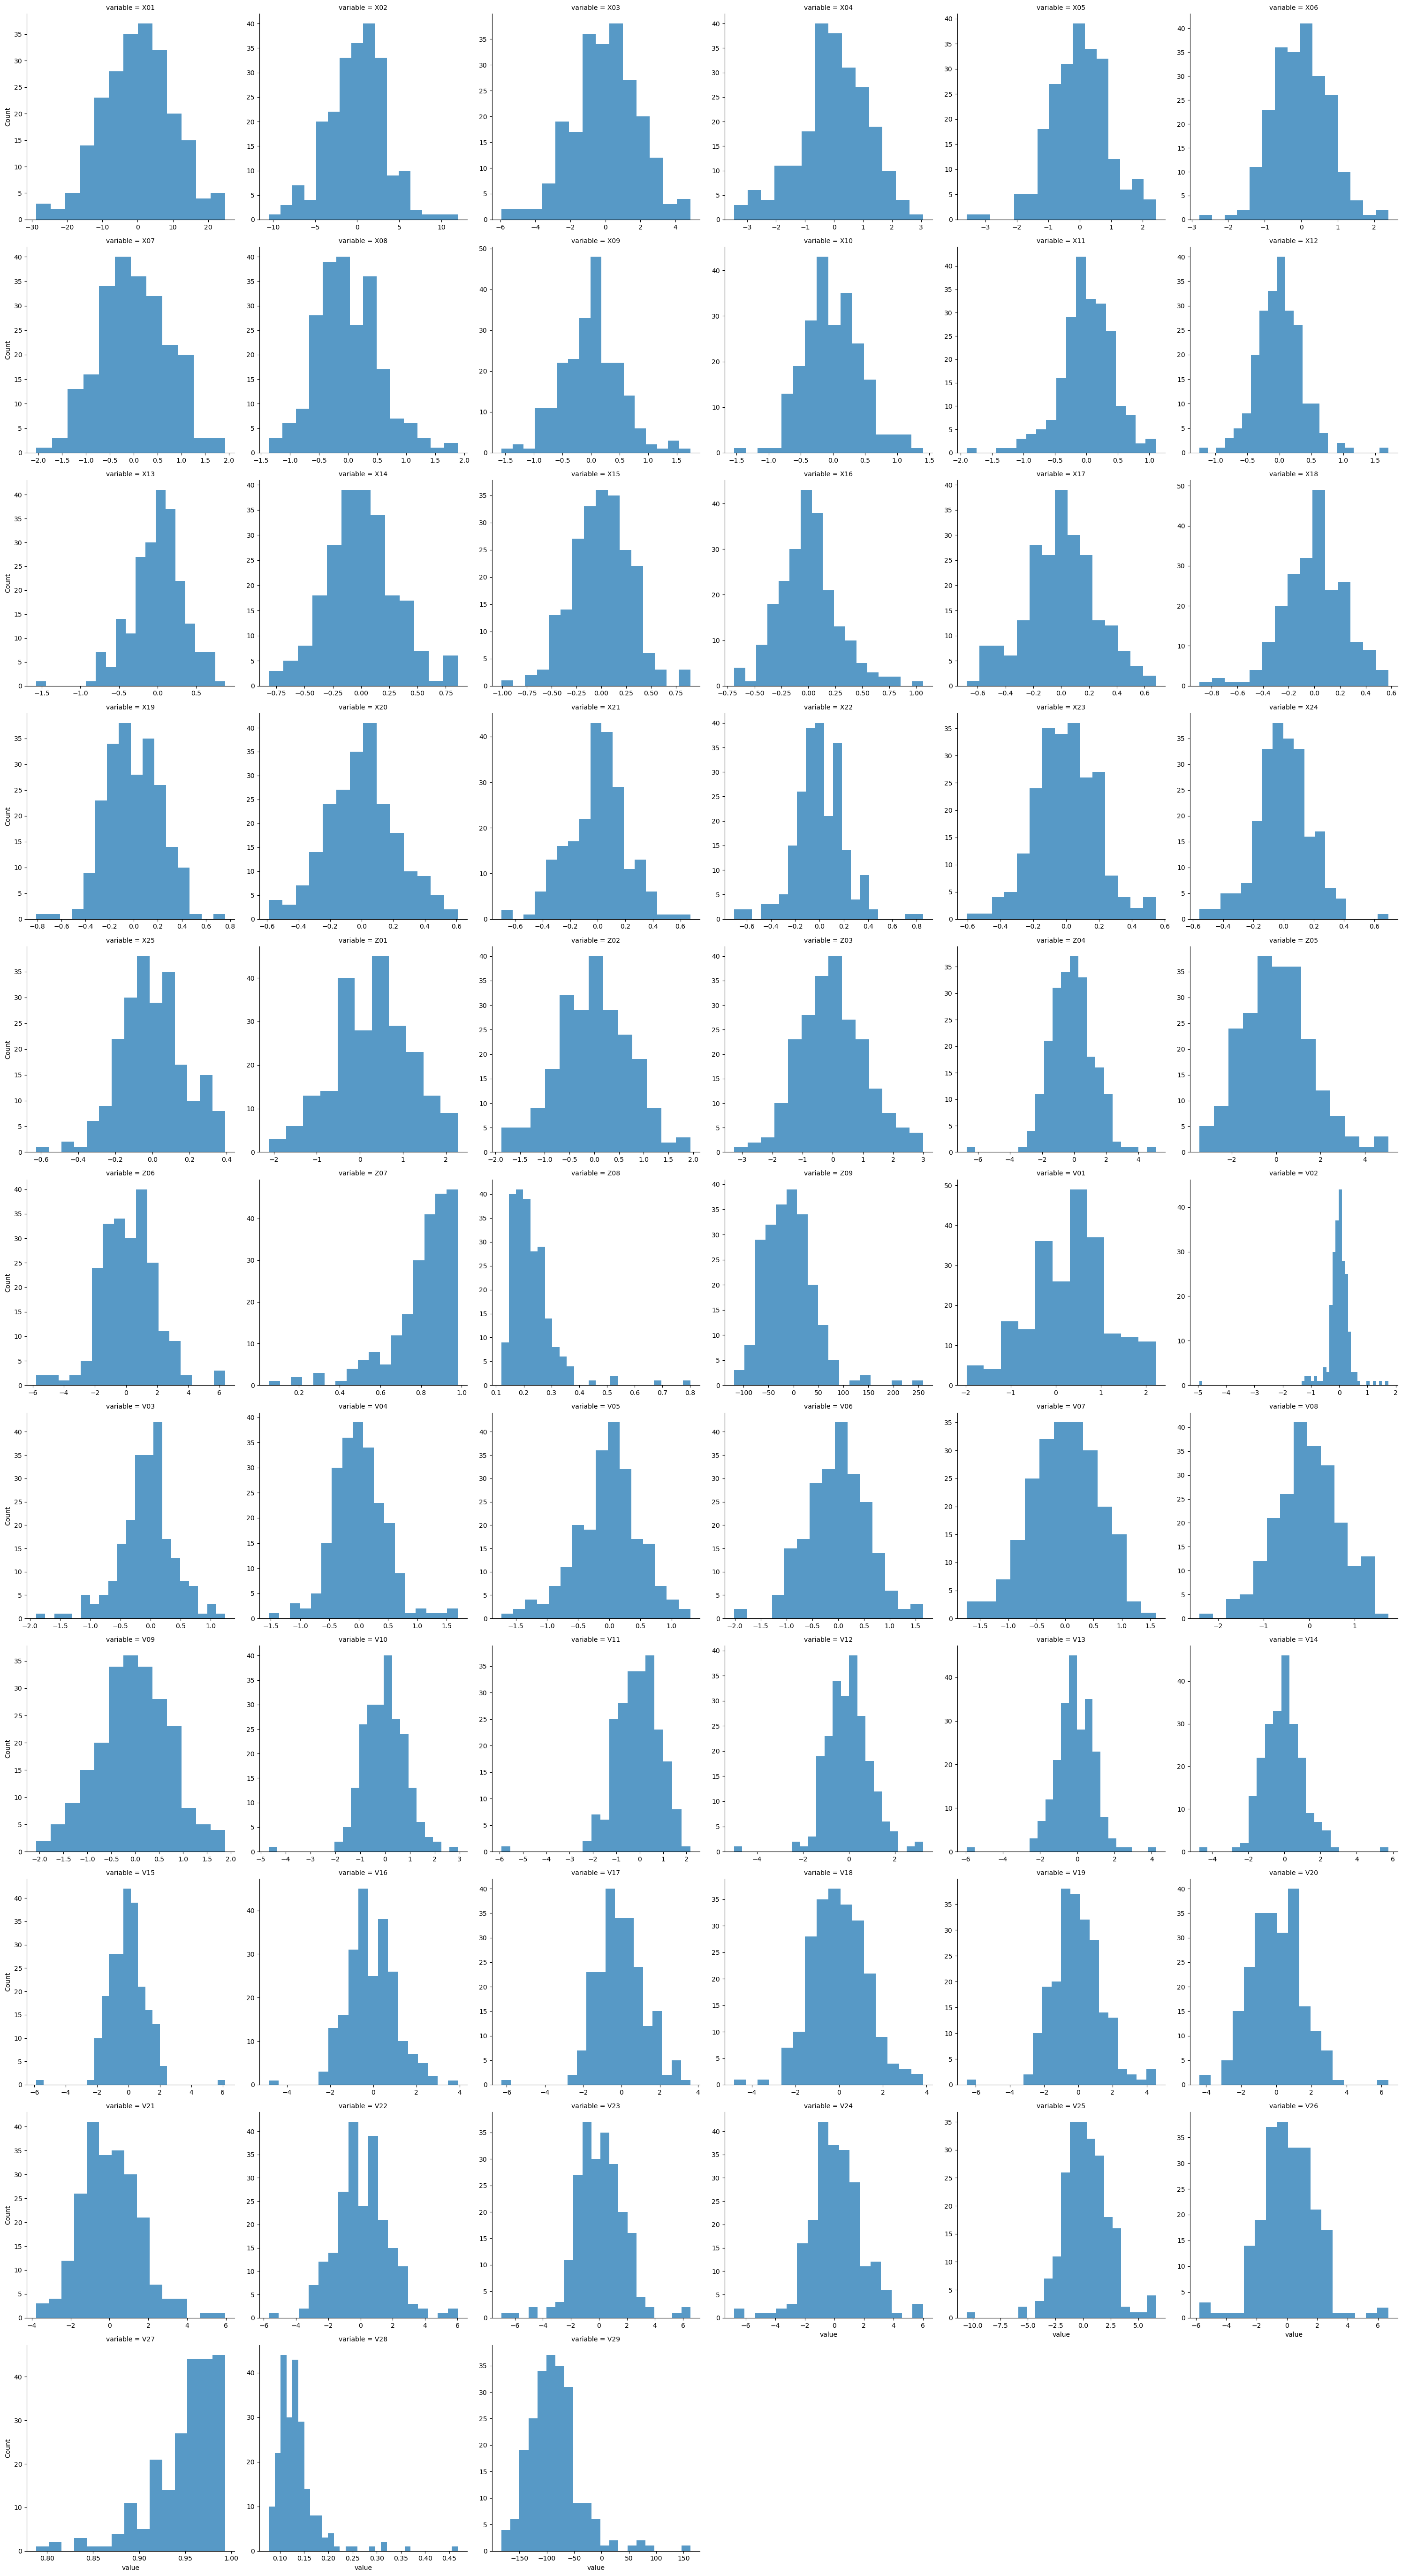

In [17]:
# Visualize all of the input variables using faceted histograms
sns.displot(data=lf, x='value', col='variable', kind='hist',\
col_wrap=6, facet_kws={'sharex': False, 'sharey': False},\
common_bins=False)

plt.show()

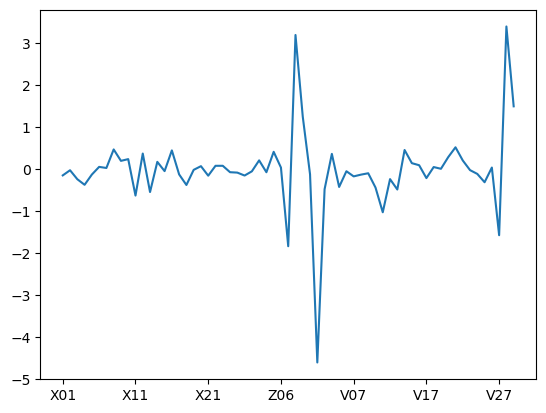

In [14]:
# Calculate and plot the skew for all input variables
fig, ax = plt.subplots()

df.drop(columns=['Y']).skew().plot(ax=ax)

plt.show()

We could apply a transformation fuction to see if it helps remove the skew. We will attempt this is with an inverse, natural log, and square root transformation.

In [16]:
# Create an object of variable names with positive skew (> 1)
high_skew_inputs = input_names[ np.abs(df.drop(columns=['Y']).skew()) > 1 ]
high_skew_inputs

Index(['Z07', 'Z08', 'Z09', 'V02', 'V11', 'V27', 'V28', 'V29'], dtype='object')

In [18]:
# Get the high skew input data
lf_skew = lf.loc[ lf.variable.isin(high_skew_inputs), :].copy()
lf_skew = lf_skew.loc[ ~lf_skew.variable.isin(['V02', 'V11', 'V29', 'Z09']), :].copy()

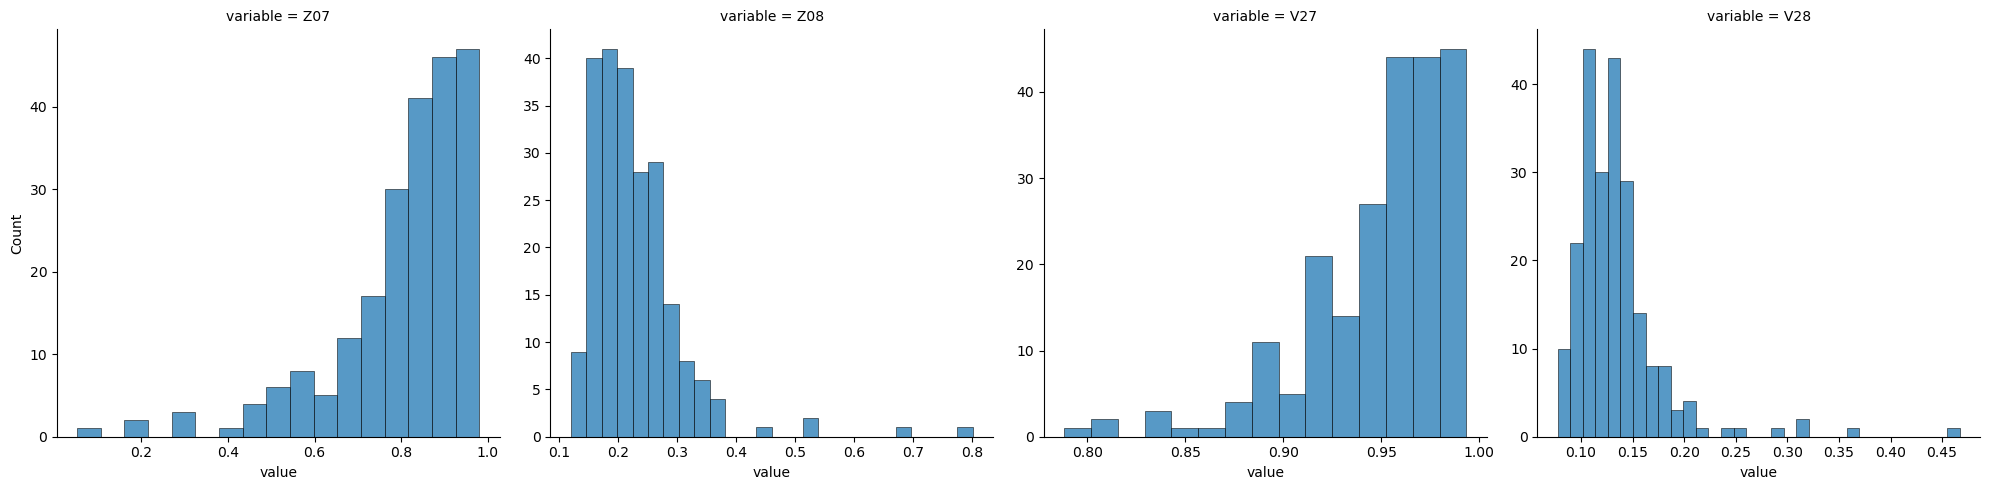

In [19]:
# Visualize just the high skew variables
sns.displot(data = lf_skew, 
            x='value', col='variable', kind='hist', col_wrap=4,
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False)

plt.show()

### Inverse Transformation

In [20]:
# Apply the inverse transformation
lf_skew['inverse_value'] = 1 / lf_skew.value

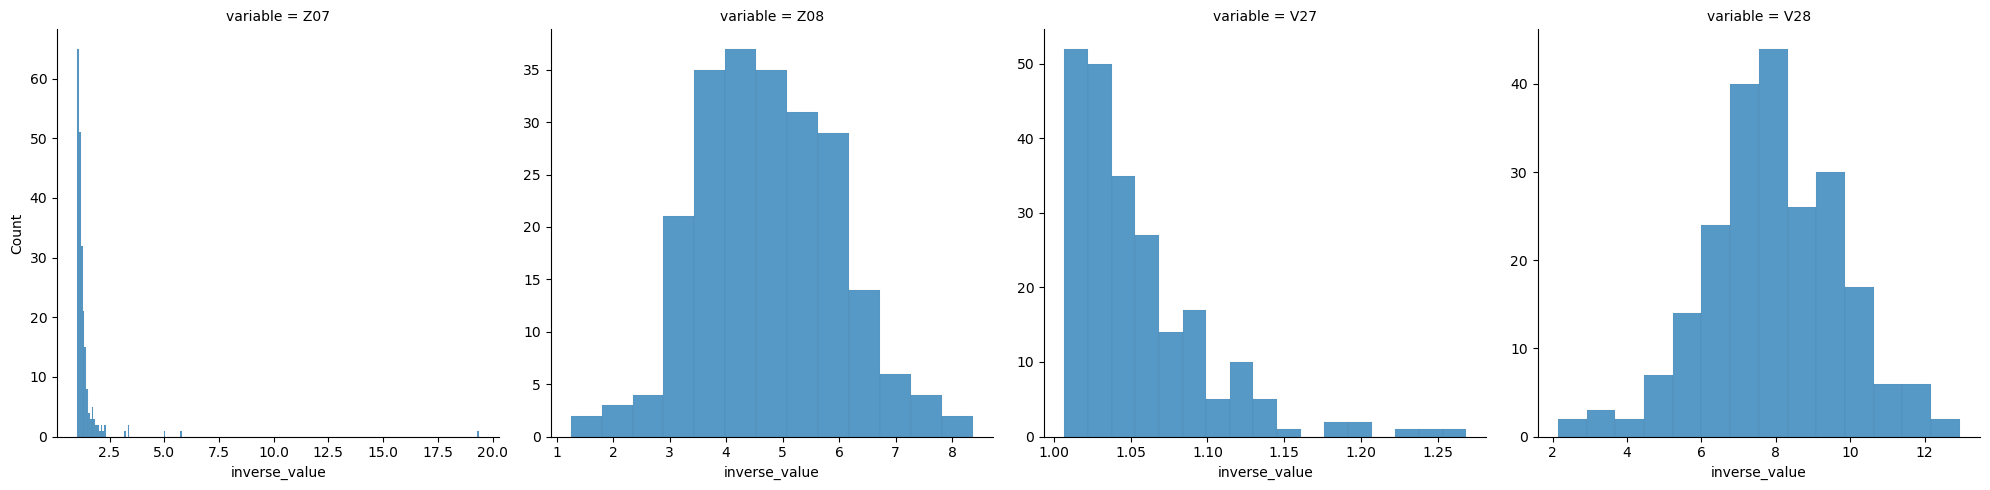

In [21]:
# Visualize the transformed variables
sns.displot(data = lf_skew, 
            x='inverse_value', col='variable', kind='hist', col_wrap=4,
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False)

plt.show()

The `inverse transformation` helped to fix the skew in variables `Z08` and `V28`, but not in `Z07` or `V27`.

### Log Transformation

In [26]:
# Apply the natural log transformation
lf_skew['log_value'] = np.log( lf_skew.value )

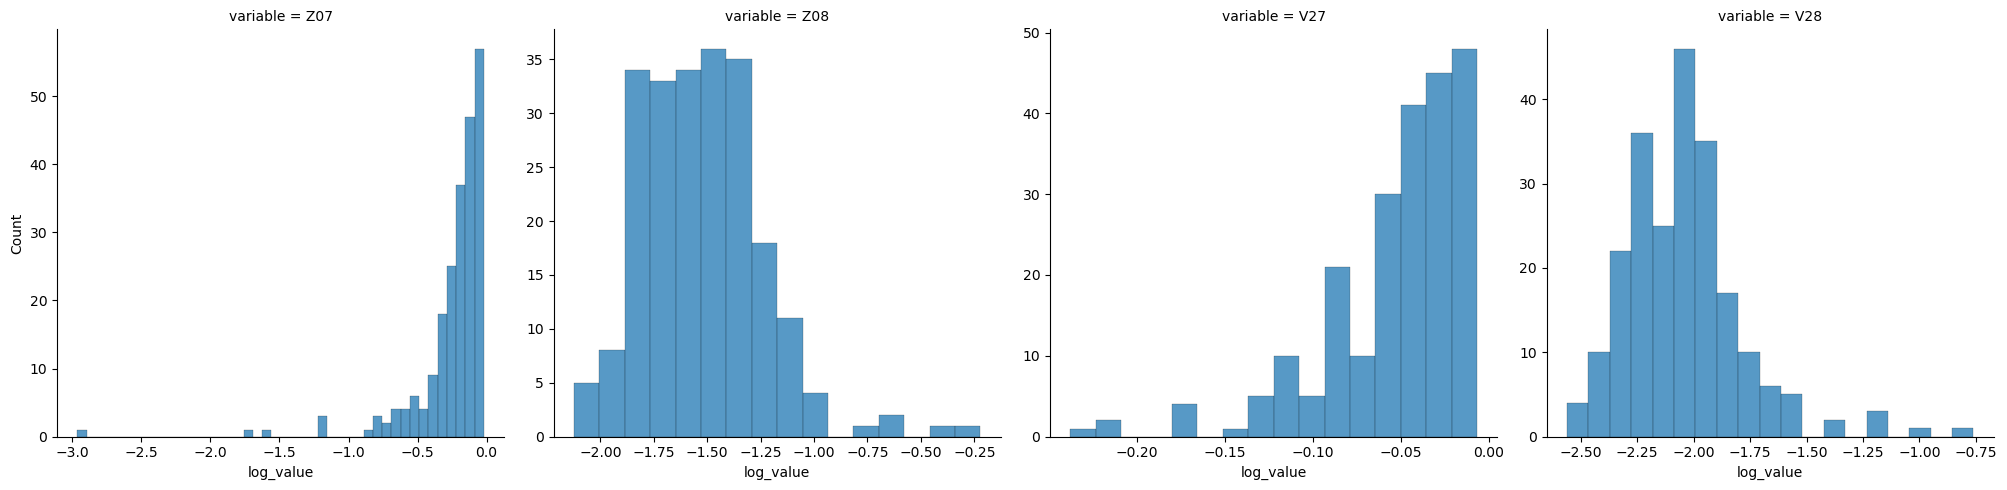

In [28]:
# Visualize the transformed variables
sns.displot(data = lf_skew, 
            x='log_value', col='variable', kind='hist', col_wrap=8,
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False)

plt.show()

The `log transformation` did not seem to help fix the skew that much.

### Square Root Transformation

In [29]:
# Apply the square root transformation
lf_skew['sqrt_value'] = np.sqrt( lf_skew.value )

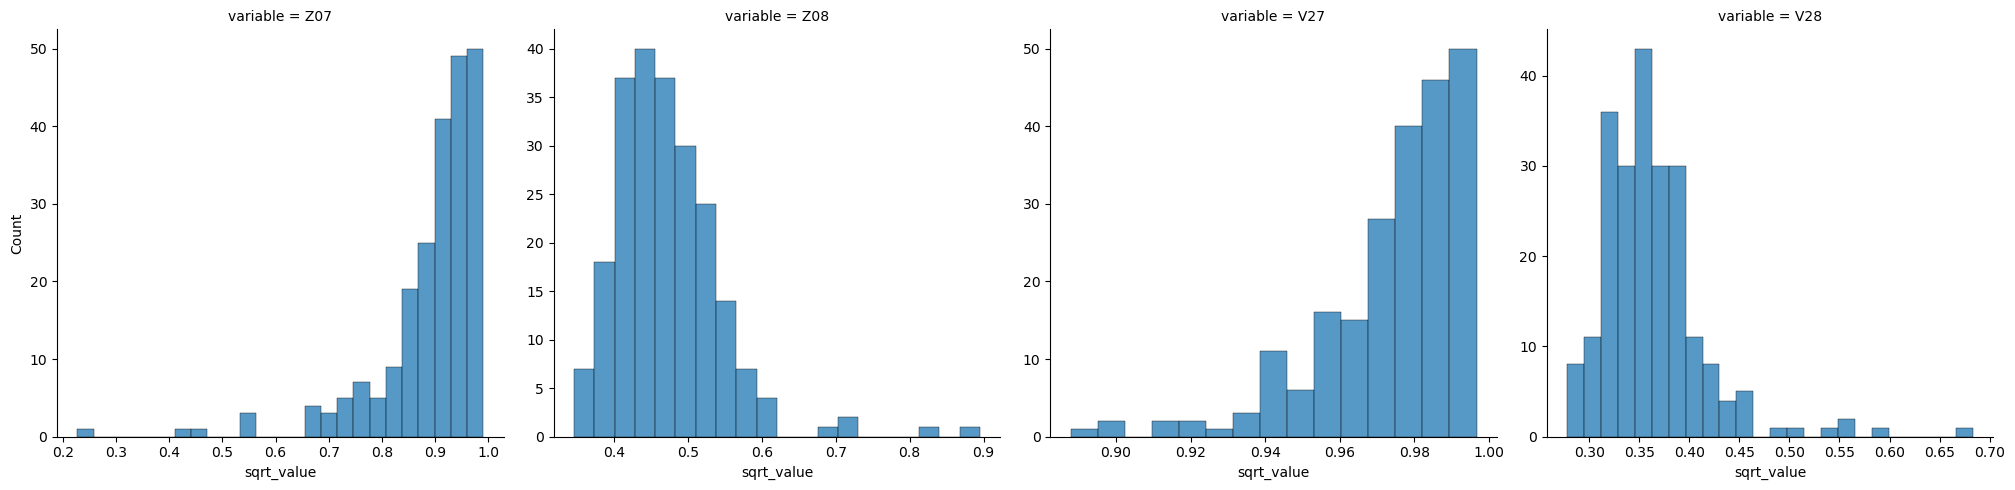

In [30]:
# Visualize the transformed variables
sns.displot(data = lf_skew, 
            x='sqrt_value', col='variable', kind='hist', col_wrap=8,
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False)

plt.show()

The `square root transformation` also did not fix the skew.

#### Heirarchical Clustering

In [91]:
from scipy.cluster import hierarchy

In [94]:
# Heirarchical clustering with complete linkage
hclust_complete = hierarchy.complete(Xinput)

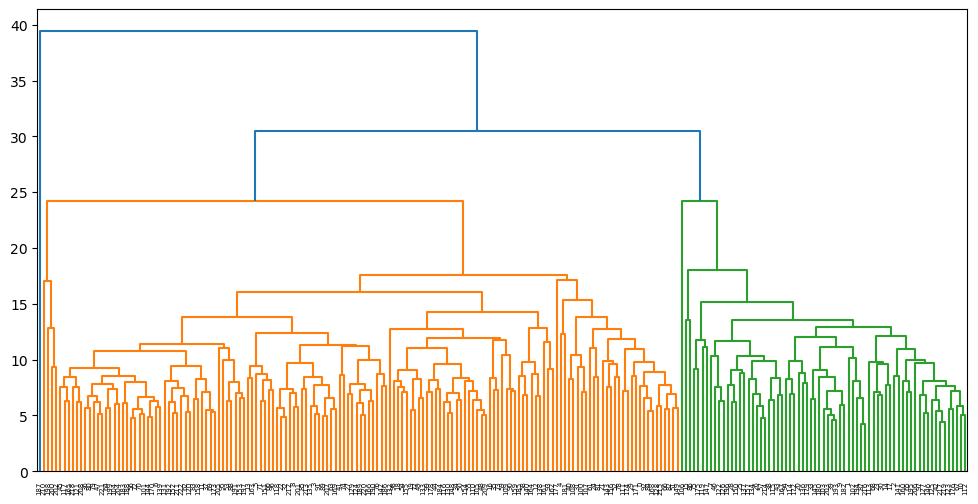

In [96]:
# Visualize the resulting dendrogram
fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram(hclust_complete)

plt.show()

### KMeans: PCA

In [99]:
# Fit and transform the data with PCA, but do not set the number of components
input_pca = PCA().fit_transform(Xinput)

In [102]:
# Create a DataFrame from resulting array
input_pca_df_63 = pd.DataFrame(input_pca, 
                             columns=['pc%02d' % d for d in range(1, input_pca.shape[1]+1)])

In [104]:
# Display the shape
input_pca_df_63.shape

(223, 63)

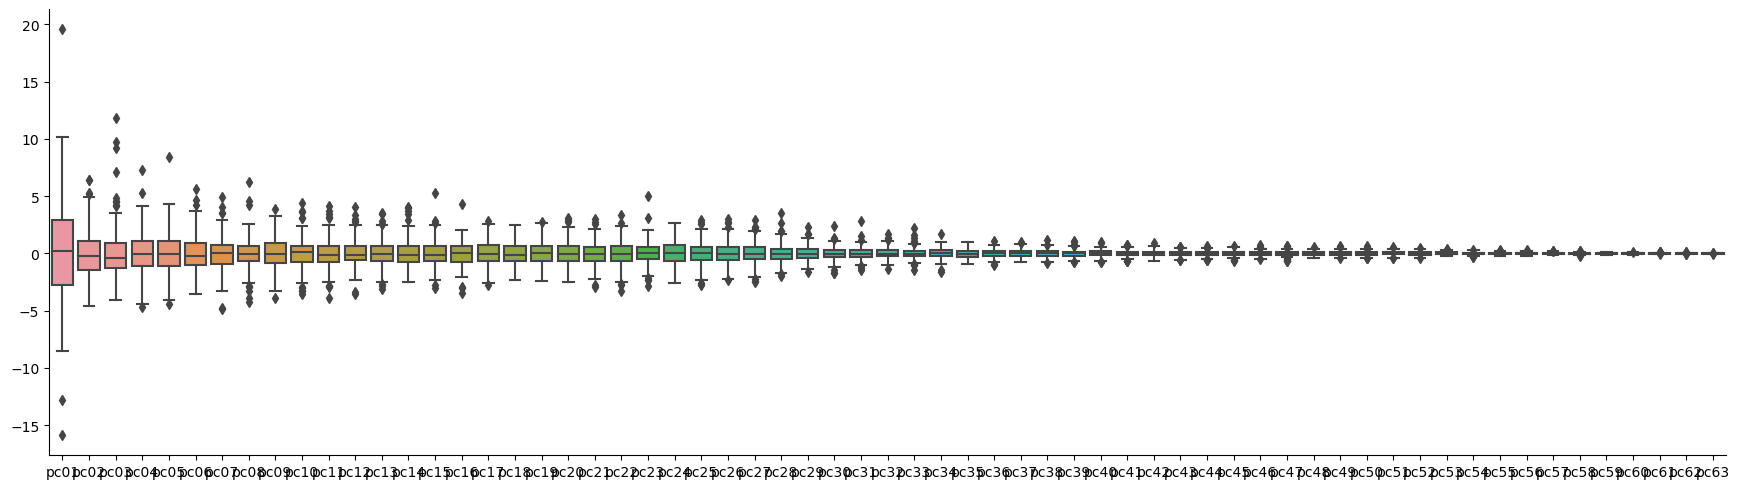

In [105]:
# Visualize the principal components using a box plot
sns.catplot(data = input_pca_df_63, kind='box', aspect=3.5)

plt.show()

In [107]:
# View the summary statistics for each princial component
input_pca_df_63.describe().round(3)

pc01     pc02     pc03     pc04     pc05     pc06     pc07     pc08  \
count  223.000  223.000  223.000  223.000  223.000  223.000  223.000  223.000   
mean    -0.000    0.000   -0.000   -0.000    0.000    0.000   -0.000    0.000   
std      4.297    2.174    2.050    1.763    1.663    1.476    1.374    1.298   
min    -15.848   -4.603   -4.087   -4.652   -4.428   -3.577   -4.825   -4.280   
25%     -2.792   -1.436   -1.242   -1.118   -1.090   -0.999   -0.881   -0.656   
50%      0.172   -0.255   -0.409   -0.076   -0.068   -0.184    0.014   -0.083   
75%      2.952    1.125    0.907    1.107    1.078    0.942    0.744    0.673   
max     19.564    6.450   11.855    7.291    8.452    5.626    4.895    6.272   

          pc09     pc10  ...     pc54     pc55     pc56     pc57     pc58  \
count  223.000  223.000  ...  223.000  223.000  223.000  223.000  223.000   
mean     0.000    0.000  ...   -0.000    0.000   -0.000   -0.000    0.000   
std      1.263    1.200  ...    0.101    0.093    0.085    0.076    0.056   
min     -3.875   -3.575  ...   -0.291   -0.235   -0.203   -0.171   -0.195   
25%     -0.827   -0.719  ...   -0.061   -0.059   -0.058   -0.052   -0.033   
50%     -0.062    0.106  ...    0.003    0.003    0.001   -0.005   -0.006   
75%      0.882    0.625  ...    0.071    0.062    0.054    0.044    0.036   
max      3.885    4.415  ...    0.313    0.257    0.341    0.205    0.233   

          pc59     pc60     pc61     pc62     pc63  
count  223.000  223.000  223.000  223.000  223.000  
mean     0.000    0.000   -0.000   -0.000   -0.000  
std      0.048    0.039    0.029    0.021    0.013  
min     -0.121   -0.102   -0.073   -0.067   -0.036  
25%     -0.034   -0.027   -0.019   -0.014   -0.009  
50%     -0.002   -0.002   -0.000    0.002   -0.000  
75%      0.034    0.027    0.016    0.014    0.008  
max      0.137    0.125    0.093    0.090    0.038  

[8 rows x 63 columns]

In [ ]:
input_pca_df_63.describe().loc['std'] > 0.85

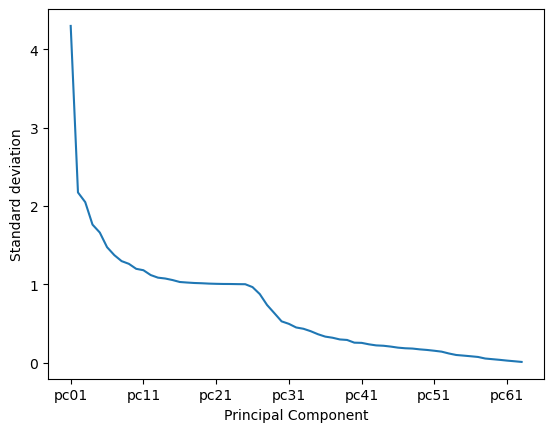

In [114]:
# Display the standard deviation (variance) for all 63 components
fig, ax = plt.subplots()

input_pca_df_63.describe().loc[ 'std' ].plot(ax=ax)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Standard deviation')

plt.show()

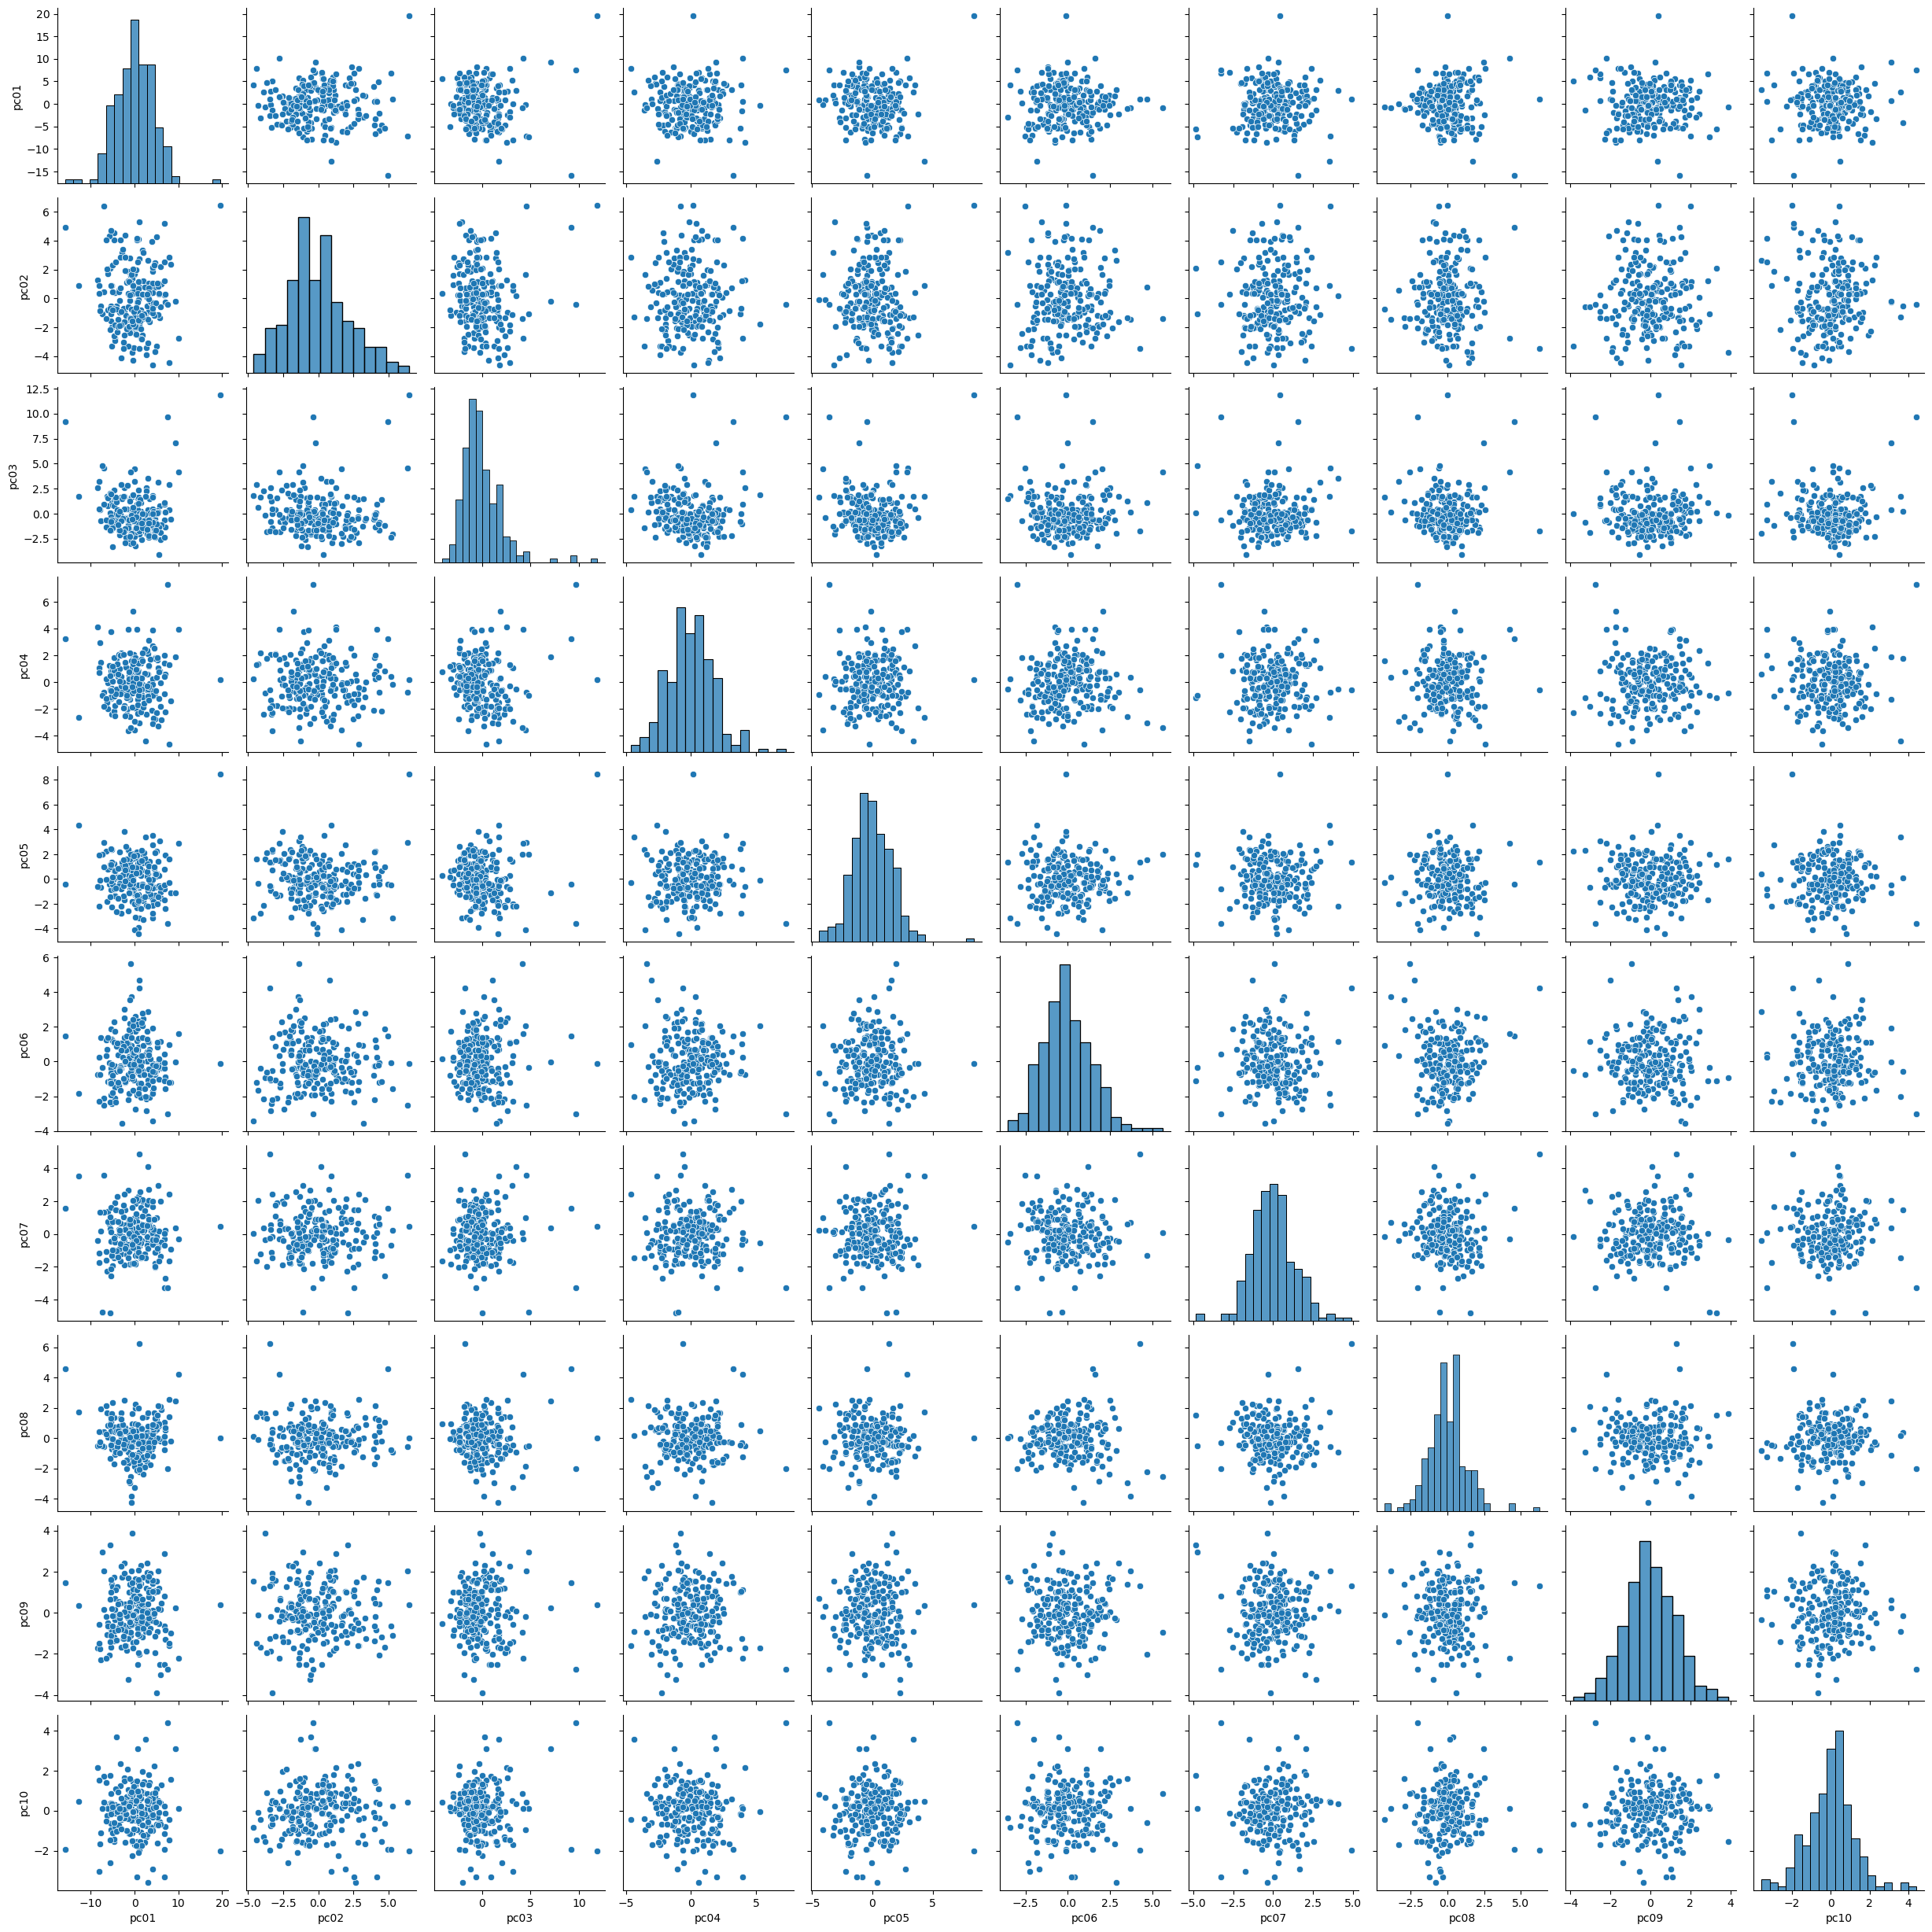

In [113]:
sns.pairplot(data = input_pca_df_63.iloc[:, :10])

plt.show()